# Anomoly Detection 
Generate and Visualize Data
Created 100 samples from a normal distribution with a mean of 10 and standard deviation of 2.

Manually added 3 outliers (15, 20, 25) which would be very rare to observe.

In [1]:
from scipy.stats import norm

mean = 10
std_dev = 2
for observation in [15, 20, 25]:
    z = (observation - mean) / std_dev # Find z-score
    probability = norm.cdf(z)
    print(f"The probability of observing a value less than or equal to {observation} is {probability}")

The probability of observing a value less than or equal to 15 is 0.9937903346742238
The probability of observing a value less than or equal to 20 is 0.9999997133484281
The probability of observing a value less than or equal to 25 is 0.9999999999999681


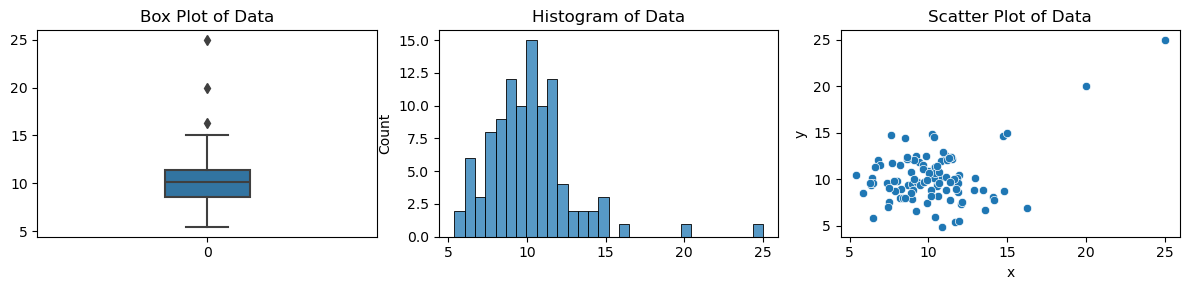

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

data_x = np.append(np.random.normal(10, 2, 100), [15, 20, 25])
data_y = np.append(np.random.normal(10, 2, 100), [15, 20, 25])
df = pd.DataFrame({'x': data_x, 'y': data_y})

fig, axs = plt.subplots(1, 3, figsize=(12, 3))

sns.boxplot(data_x, width=.25, ax=axs[0])
axs[0].set_title('Box Plot of Data')

sns.histplot(data_x, bins=30, kde=False, ax=axs[1])
axs[1].set_title('Histogram of Data')

sns.scatterplot(x='x', y='y', data=df, ax=axs[2])
axs[2].set_title('Scatter Plot of Data')

plt.tight_layout()
plt.show()

## Interquartile Range (IQR)

In [3]:
Q1 = df['x'].quantile(0.25) # 25th percentile
Q3 = df['x'].quantile(0.75) # 75th percentile
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"lower_bound: {lower_bound:0.2f}")
print(f"upper_bound: {upper_bound:0.2f}")

outliers = df[(df['x'] < lower_bound) | (df['x'] > upper_bound)]
outliers[['x']]

lower_bound: 4.39
upper_bound: 15.56


,x
84,16.290452
101,20.000000
102,25.000000


## Z-Score
A common threshold for identifying outliers is a Z-score greater than 3 or less than -3.

In [4]:
df['z_score'] = stats.zscore(df['x'])
df[abs(df.z_score) >= 3]

,x,y,z_score
101,20.0,20.0,3.538077
102,25.0,25.0,5.345555


## DBSCAN Clustering
cluster = -1 are considered outliers by DBSCAN

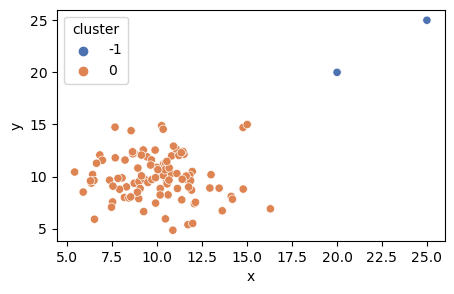

In [5]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['x','y']])

dbscan = DBSCAN(eps=1.5, min_samples=2)
df['cluster'] = dbscan.fit_predict(df_scaled)

plt.figure(figsize=(5, 3))
sns.scatterplot(x='x', y='y', data=df, hue='cluster', palette="deep")
plt.show()

## Isolation Forest <a name="Isolation-Forest"></a> 

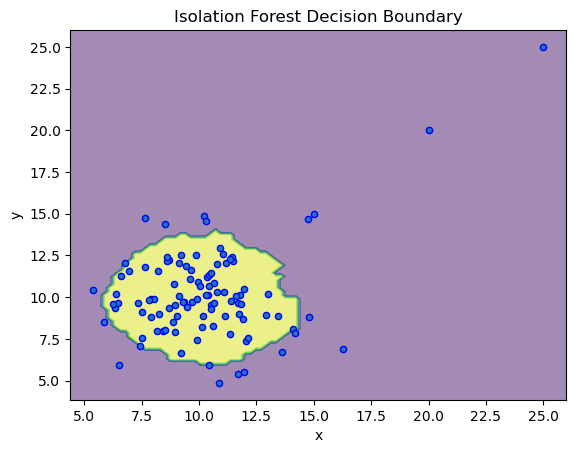

In [6]:
clf = IsolationForest(random_state=42).fit(df[['x','y']])
# clf.predict(df[['x','y']])

disp = DecisionBoundaryDisplay.from_estimator(clf, df[['x','y']], response_method="predict", alpha=0.5)
disp.ax_.scatter(df['x'], df['y'], s=20, edgecolor="b")
disp.ax_.set_title("Isolation Forest Decision Boundary")
plt.show()

## Local Outlier Factor (LOF)
* [scikit-learn API](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html#sklearn.neighbors.LocalOutlierFactor)
* [Outlier detection with Local Outlier Factor (LOF)](https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html)

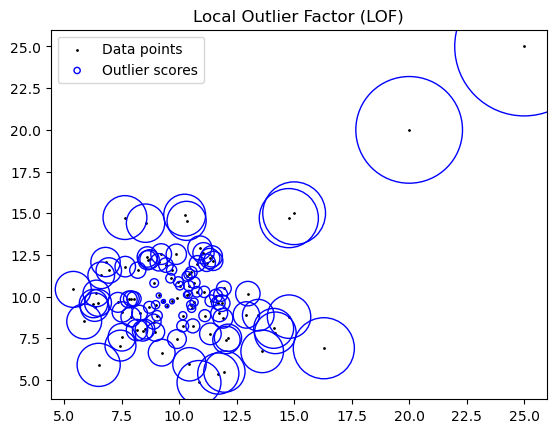

In [7]:
from sklearn.neighbors import LocalOutlierFactor
from matplotlib.legend_handler import HandlerPathCollection

clf = LocalOutlierFactor(n_neighbors=50)
y_pred = clf.fit_predict(df[['x','y']])
X_scores = clf.negative_outlier_factor_

def update_legend_marker_size(handle, orig):
    handle.update_from(orig)
    handle.set_sizes([20])

plt.scatter(df['x'], df['y'], color="k", s=1, label="Data points")
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
scatter = plt.scatter(df['x'], df['y'], s=10000 * radius, edgecolors="b", facecolors="none", label="Outlier scores")
plt.legend(handler_map={scatter: HandlerPathCollection(update_func=update_legend_marker_size)})
plt.title("Local Outlier Factor (LOF)")
plt.show()


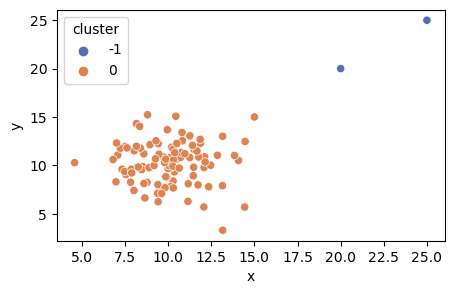

## References
- [The UCR Matrix Profile Page](https://www.cs.ucr.edu/~eamonn/MatrixProfile.html)
- [Matrix Profile Example](https://github.com/matrix-profile-foundation/article-matrix-profile-intro/blob/master/Matrix%20Profile%20Example.ipynb)